## **1. Installing Kaggle**

In [6]:
# !pip install kaggle

## **2. Creating Kaggle Directory**

In [ ]:
import os

os.makedirs(r".kaggle", exist_ok=True)
print("Created:", os.path.exists(r".kaggle"))


Created: True


## **3. Creating a Kaggle Token**

## **4. Searching for the Dataset and Downloads**

In [ ]:
!kaggle datasets list -s "olist"

ref                                                          title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
olistbr/brazilian-ecommerce                                  Brazilian E-Commerce Public Dataset by Olist        44717580  2021-10-01 19:08:27.970000         415677       3804                1  
olistbr/marketing-funnel-olist                               Marketing Funnel by Olist                             284562  2018-11-16 14:00:20.677000          17678        317                1  
terencicp/e-commerce-dataset-by-olist-as-an-sqlite-database  E-commerce dataset by Olist (SQLite)                51085670  2024-04-28 14:56:35.423000           9262         90                1  
erak1006/brazilian-e-comm

In [ ]:
!kaggle datasets download -d "olistbr/marketing-funnel-olist" -p "Data/" --unzip

Dataset URL: https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/278k [00:00<?, ?B/s]
100%|██████████| 278k/278k [00:01<00:00, 258kB/s]
100%|██████████| 278k/278k [00:01<00:00, 257kB/s]


In [ ]:
!kaggle datasets download -d "olistbr/brazilian-ecommerce" -p "Data/" --unzip

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/42.6M [00:00<?, ?B/s]
  2%|▏         | 1.00M/42.6M [00:01<01:05, 665kB/s]
  5%|▍         | 2.00M/42.6M [00:01<00:31, 1.34MB/s]
  7%|▋         | 3.00M/42.6M [00:01<00:19, 2.15MB/s]
 12%|█▏        | 5.00M/42.6M [00:02<00:09, 3.98MB/s]
 14%|█▍        | 6.00M/42.6M [00:02<00:08, 4.53MB/s]
 19%|█▉        | 8.00M/42.6M [00:02<00:05, 6.32MB/s]
 23%|██▎       | 10.0M/42.6M [00:02<00:04, 7.73MB/s]
 28%|██▊       | 12.0M/42.6M [00:02<00:03, 8.84MB/s]
 33%|███▎      | 14.0M/42.6M [00:02<00:03, 9.65MB/s]
 38%|███▊      | 16.0M/42.6M [00:03<00:02, 10.3MB/s]
 42%|████▏     | 18.0M/42.6M [00:03<00:02, 10.7MB/s]
 47%|████▋     | 20.0M/42.6M [00:03<00:02, 11.1MB/s]
 52%|█████▏    | 22.0M/42.6M [00:03<00:01, 11.3MB/s]
 56%|█████▋    | 24.0M/42.6M [00:03<00:01, 11.4MB/s]
 61%|██████    | 26.0M/42.6M [00:04<00:01, 11.6MB/s]
 66%|██████▌   | 28.0M/42.6M [00:04<00:01, 11.6MB/s]
 70%|███████   | 30.0M/42.6M [00:04<00:01, 11.7MB/s]
 75%|███████▌  | 32.0M/42.6M [00:04<00:00, 11.9MB/s]
 8

## **5. Accessing the Downloaded Datasets**

In [ ]:
os.listdir("Data")

['olist_closed_deals_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_marketing_qualified_leads_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

## **Data Preprocessing:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="missing ScriptRunContext")

In [ ]:
cld = pd.read_csv(r"Data/olist_closed_deals_dataset.csv")
mql = pd.read_csv(r"Data/olist_marketing_qualified_leads_dataset.csv")
product = pd.read_csv(r"Data/olist_products_dataset.csv")
product_rename = pd.read_csv(r"Data/product_category_name_translation.csv")
order = pd.read_csv(r"Data/olist_orders_dataset.csv")

## **6. Checking for Missing Values**

In [5]:
def summarize_missing_values(dataframe):
    summary = {}                                                    # This will later store missing value results for every dataset.
    for name, df in dataframe:                                      # it receives (name, DataFrame) pairs.
        missing_values = df.isnull().sum()                          # counts how many missing values there are in each column.
        total_values = df.shape[0]                                  # .shape[0] means how many rows the dataset has.
        missing_percentage = (missing_values / total_values) * 100

        missing_df = pd.DataFrame({                                 # Creates a table(DataFrame) of missing values
            "missing count": missing_values,
            "missing percentage": round(missing_percentage,2)  
        }).query("`missing count` > 0")


        summary[name] = missing_df                                  # Stores result using dataset name as key.
    return summary

In [6]:
missing_summary = summarize_missing_values([                        # missing_summary is just a collection of missing-value results.
    ("cld", cld),
    ("mql", mql),
    ("product", product),
    ("product_rename", product_rename),
    ("order", order)
])

for name, df in missing_summary.items():                            # This loops through every dataset in the missing_summary dictionary. "df → the missing values table for that dataset".
    print(f"Missing values in {name}:")
    if df.empty:
        print("No missing values.\n")
    else:
        print(df, "\n")

Missing values in cld:
                               missing count  missing percentage
business_segment                           1                0.12
lead_type                                  6                0.71
lead_behaviour_profile                   177               21.02
has_company                              779               92.52
has_gtin                                 778               92.40
average_stock                            776               92.16
business_type                             10                1.19
declared_product_catalog_size            773               91.81 

Missing values in mql:
        missing count  missing percentage
origin             60                0.75 

Missing values in product:
                            missing count  missing percentage
product_category_name                 610                1.85
product_name_lenght                   610                1.85
product_description_lenght            610                1.85
produc

## **7. Handling Missing Values:**

Creating duplicate dataset for safer side

In [7]:
cld_clean = cld.copy()
mql_clean = mql.copy()
product_clean = product.copy()
order_clean = order.copy()

In [8]:
order_clean.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Dropping rows who's missing values are less then 5%

✔️ Why?

These columns are important for analysis, so rows missing these fields are unusable.

In [9]:
cld_clean     = cld_clean.dropna(subset = ['business_segment', 'lead_type', 'business_type'])

mql_clean     = mql_clean.dropna(subset = ['origin'])

product_clean = product_clean.dropna(subset = ['product_category_name', 'product_name_lenght',
                            'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                            'product_length_cm', 'product_height_cm', 'product_width_cm'])

order_clean   = order_clean.dropna(subset = ['order_approved_at', 'order_delivered_carrier_date'])

In [10]:
missing_summary = summarize_missing_values([                        # missing_summary is just a collection of missing-value results.
    ("cld", cld_clean),
    ("mql", mql_clean),
    ("product", product_clean),
    ("order", order_clean)
])

for name, df in missing_summary.items():                            # This loops through every dataset in the missing_summary dictionary. "df → the missing values table for that dataset".
    print(f"Missing values in {name}:")
    if df.empty:
        print("No missing values.\n")
    else:
        print(df, "\n")

Missing values in cld:
                               missing count  missing percentage
lead_behaviour_profile                   171               20.73
has_company                              762               92.36
has_gtin                                 761               92.24
average_stock                            759               92.00
declared_product_catalog_size            756               91.64 

Missing values in mql:
No missing values.

Missing values in product:
No missing values.

Missing values in order:
                               missing count  missing percentage
order_delivered_customer_date           1183                1.21 



In [11]:
cld_clean.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'has_company', 'has_gtin', 'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue'],
      dtype='object')

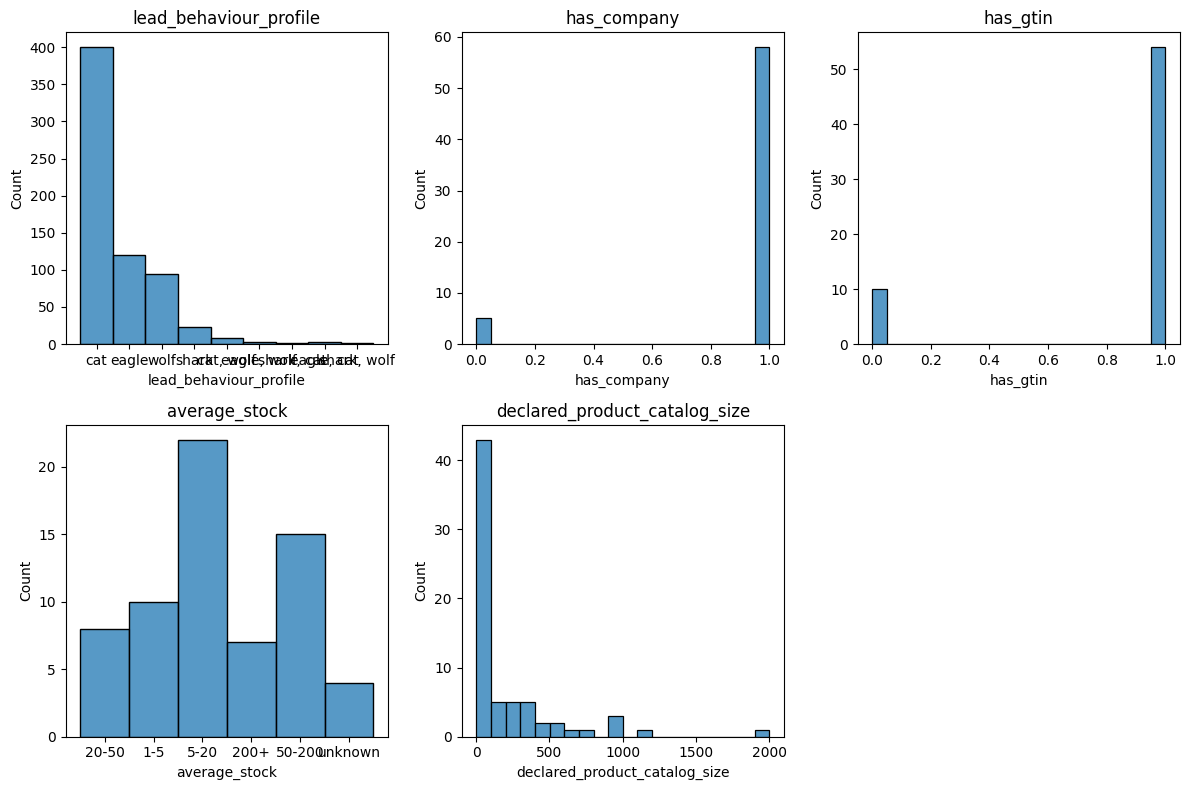

In [12]:
columns = ['lead_behaviour_profile', 'has_company', 'has_gtin', 'average_stock', 'declared_product_catalog_size']

plt.figure(figsize=(12,8))

for i, col in enumerate(columns, 1):
    plt.subplot(2,3,i)
    sns.histplot(cld_clean[col], bins = 20)
    plt.title(col)
plt.tight_layout()

In [13]:
cld_clean['lead_behaviour_profile'].unique()

array(['cat', 'eagle', nan, 'wolf', 'shark', 'cat, wolf', 'eagle, wolf',
       'shark, cat', 'eagle, cat', 'shark, wolf'], dtype=object)

In [14]:
cld_clean['lead_behaviour_profile'] = cld_clean['lead_behaviour_profile'].apply(lambda x:x if x in {'cat', 'eagle', 'wolf', 'shark', np.nan} else np.nan)

In [15]:
cld_clean['lead_behaviour_profile'].unique()

array(['cat', 'eagle', nan, 'wolf', 'shark'], dtype=object)

<Axes: xlabel='lead_behaviour_profile', ylabel='Count'>

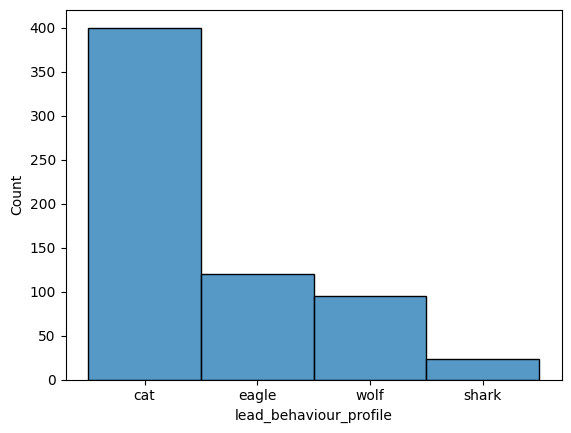

In [16]:
sns.histplot(cld_clean['lead_behaviour_profile'])

In [17]:
cld_clean['lead_behaviour_profile'] = cld_clean['lead_behaviour_profile'].fillna(cld_clean['lead_behaviour_profile'].mode()[0])

In [18]:
cld_clean['lead_behaviour_profile'].isnull().sum()

np.int64(0)

Removing unnecessary columns from the dataset:

In [19]:
cld_clean['has_company'].unique()

array([nan, True, False], dtype=object)

In [20]:
cld_clean = cld_clean.drop(columns = ['has_company', 'has_gtin'])

In [21]:
cld_clean.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'average_stock', 'business_type', 'declared_product_catalog_size',
       'declared_monthly_revenue'],
      dtype='object')

In [22]:
cld_clean = cld_clean.drop(columns = ['average_stock', 'declared_product_catalog_size'])

In [23]:
cld_clean.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'business_type', 'declared_monthly_revenue'],
      dtype='object')

## **8. Checking for Duplicate Values:**

In [24]:
def summarize_duplicate(*datasets, names = None):
    # *datasets  → the function can accept any number of datasets (flexible).
    # names=None → you can pass custom names for each dataset.
    return pd.DataFrame([{                          # returns a ** DataFrame** instead of printing multiple values.
        'Dataset': name,                            # Creating Each Row of the Summary Table
        'Total_rows': len(df),
        'Duplicated_rows': df.duplicated().sum()
        } for df, name in zip(datasets, names) ]) 

In [25]:
summarize_duplicate(cld_clean, mql_clean, product_clean, order_clean, names= ['cld', 'mql', 'product', 'order'])

,Dataset,Total_rows,Duplicated_rows
0,cld,825,0
1,mql,7940,0
2,product,32340,0
3,order,97644,0


In [29]:
cld_clean.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'business_type', 'declared_monthly_revenue'],
      dtype='object')